<a href="https://colab.research.google.com/github/Shashwot90/CV/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to neural network classification with TensorFlow

write neural networks for classification
* Binary classification
* Multiclass classification
* Multilabel classification

###CReating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


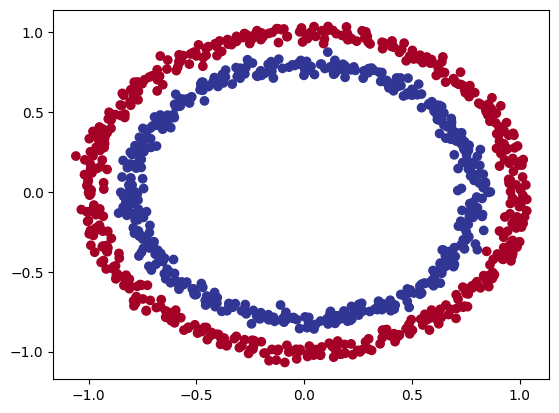

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

###Input and output shapes

In [ ]:
X.shape, y.shape


((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

###Steps in modelling

1. create model
2. compile
3. fit
4. evaluate
5. tweak
6. evaluate

In [ ]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.13.0
Notebook last run (end-to-end): 2023-10-21 13:46:48.317773


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 6.3084 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 12ms/step - loss: 5.9527 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 5.0978 - accuracy: 0.4620
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 4.9451 - accuracy: 0.4620
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.6126 - accuracy: 0.4420


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935970187187195, 0.5]

###Improve Model

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5120


[0.6978827118873596, 0.5120000243186951]

In [ ]:
import numpy as np

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


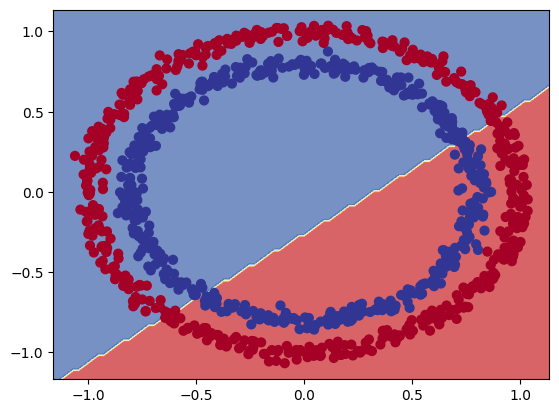

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:

# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 503.3506 - mae: 503.3506
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 408.8983 - mae: 408.8983
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 318.0845 - mae: 318.0845
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 223.0882 - mae: 223.0882
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 122.8911 - mae: 122.8911
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 49.8004 - mae: 49.8004
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 75.2797 - mae: 75.2797
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 67.1512 - mae: 67.1512
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9724 - mae: 45.9724
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 50.0839 - mae: 50.0839
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 5ms/step


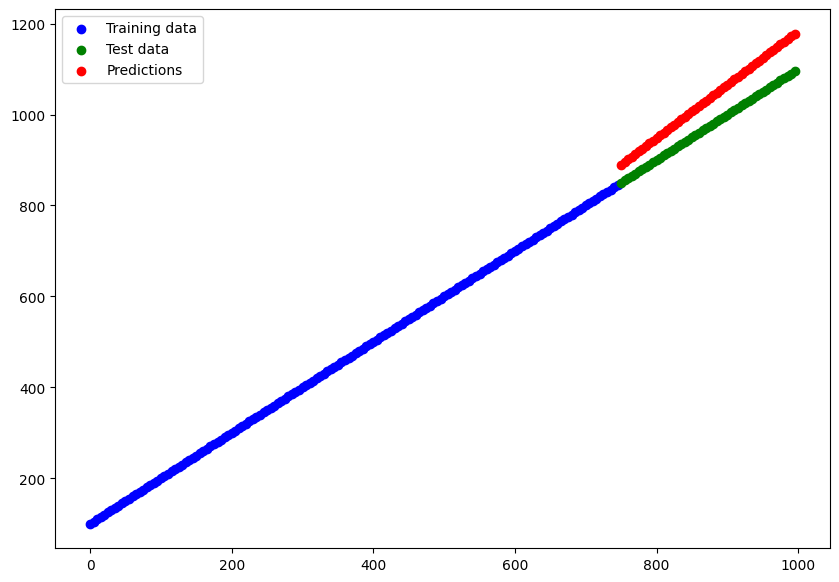

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3046 - accuracy: 0.4380
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1894 - accuracy: 0.4190
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1128 - accuracy: 0.4100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0459 - accuracy: 0.4090
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9657 - accuracy: 0.4100
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9355 - accuracy: 0.4190
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8915 - accuracy: 0.4280
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7949 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7050 - accuracy: 0.4420
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5841 - accuracy: 0.4490
Epoch 11/

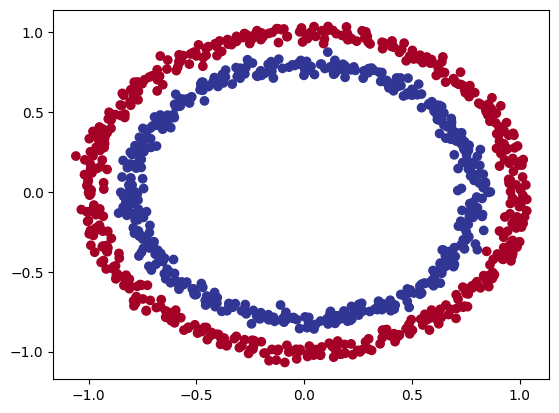

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


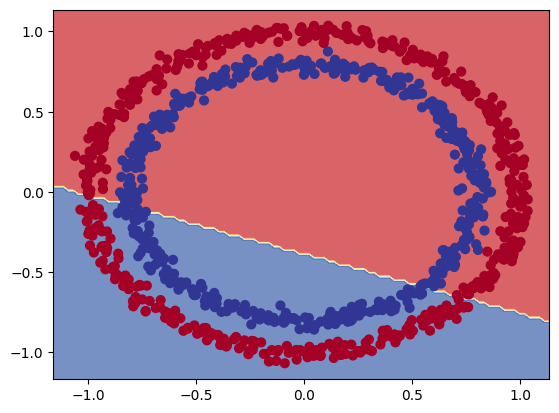

In [ ]:
plot_decision_boundary(model_4, X, y)

###Non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3131 - accuracy: 0.4280
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2471 - accuracy: 0.4470
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2021 - accuracy: 0.4480
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2000 - accuracy: 0.4470
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1988 - accuracy: 0.4470
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1976 - accuracy: 0.4480
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1797 - accuracy: 0.4490
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1469 - accuracy: 0.4490
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1240 - accuracy: 0.4510
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1104 - accuracy: 0.4510
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 3.2902 - accuracy: 0.2100
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 2.6831 - accuracy: 0.2250
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 2.4741 - accuracy: 0.2310
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 2.4144 - accuracy: 0.2250
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 2.3492 - accuracy: 0.2170
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 2.2881 - accuracy: 0.2120
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 2.2494 - accuracy: 0.2090
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1999 - accuracy: 0.2080
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1440 - accuracy: 0.2070
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1047 - accuracy: 0.2040
Epoch 11/

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9870


[0.10019054263830185, 0.9869999885559082]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


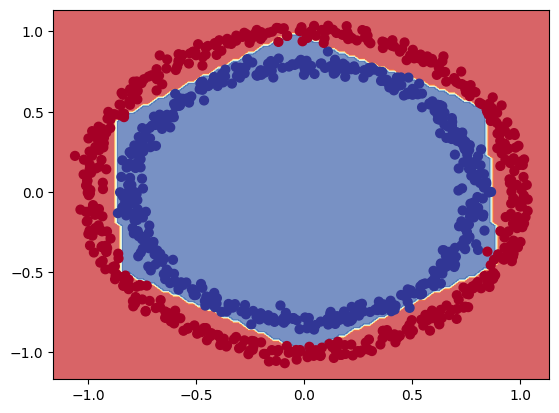

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

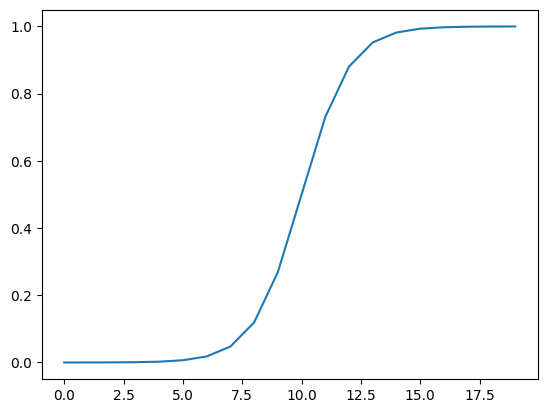

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

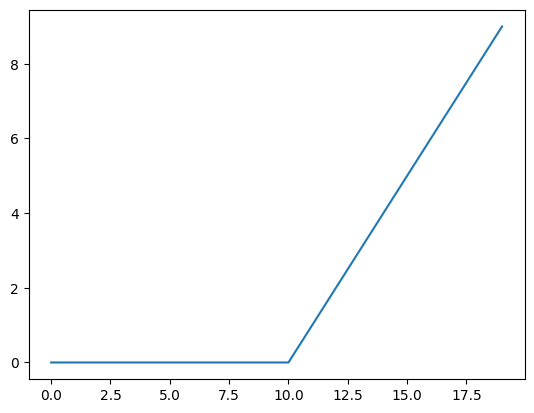

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

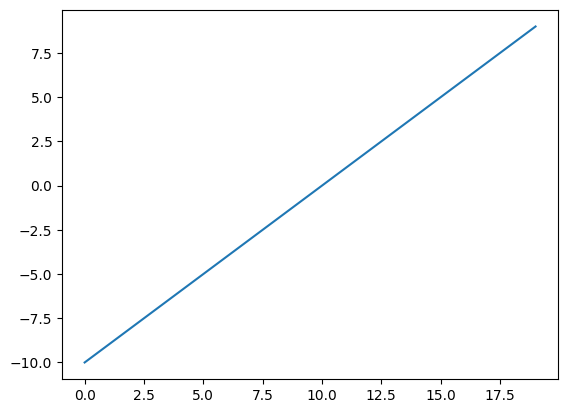

In [ ]:
plt.plot(tf.keras.activations.linear(A))

###Evaluating and improving classification

In [ ]:
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5625
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5975
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6438
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7025
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7038
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7663
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.8550
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.8788
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.9237
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.9600
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9900


[0.06914198398590088, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


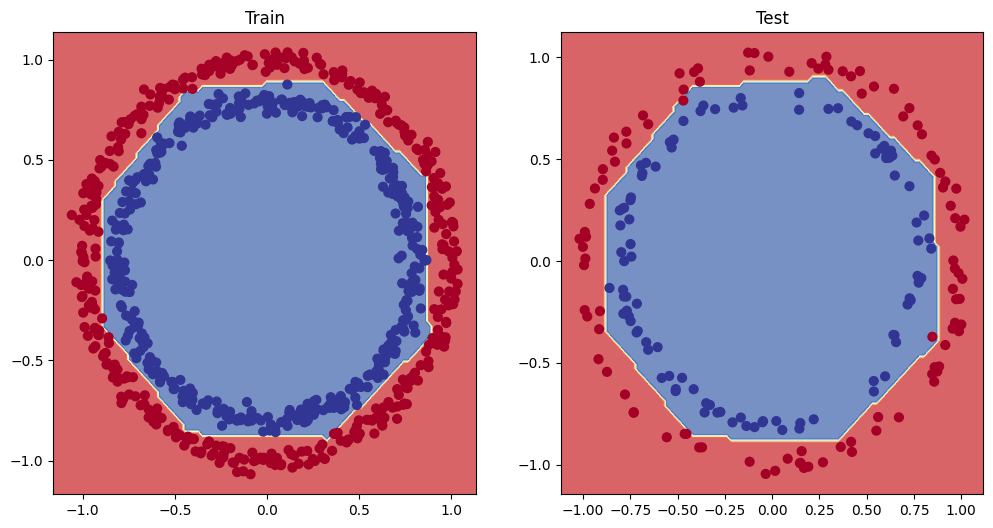

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

###PLot the loss(or training) curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.686686,0.56250
1,0.672536,0.59750
2,0.662819,0.64375
3,0.648278,0.70250
4,0.627224,0.70375
5,0.593286,0.76625
6,0.553977,0.85500
7,0.511252,0.87875
8,0.449598,0.92375
9,0.380961,0.96000


Text(0.5, 1.0, 'Model_8 loss curves')

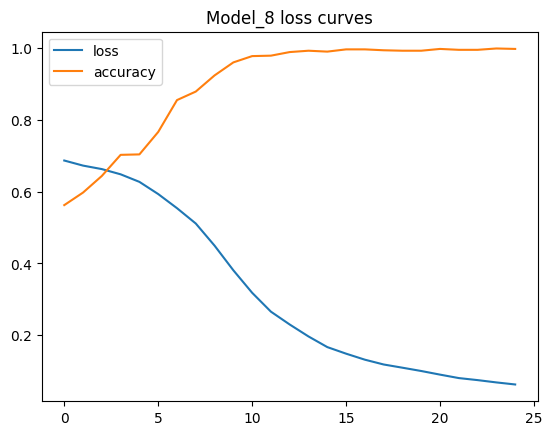

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


###Finding best learning rate

to find ideal learning rate where loss decreases the most during training

* learning rate callback - extra piece of functionality
* modified loss curve

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7117 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.5138 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5150 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

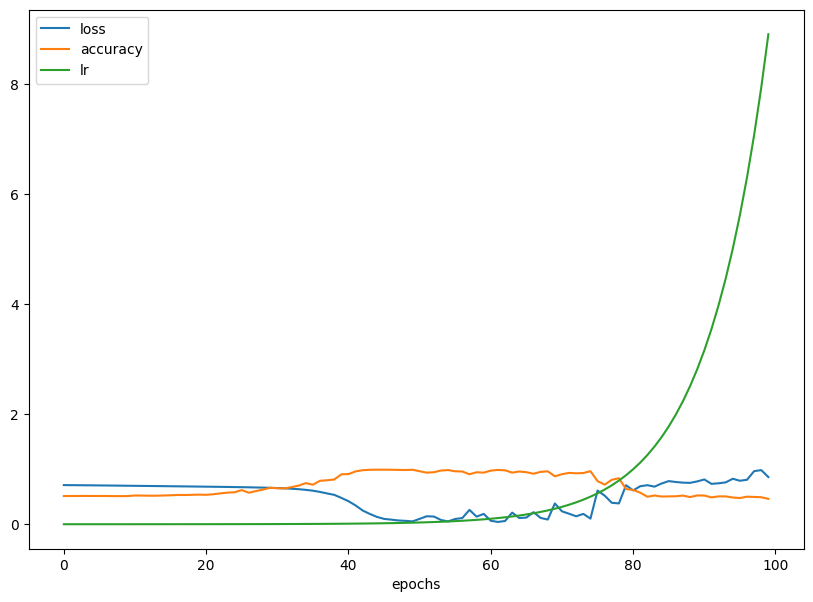

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. Loss')

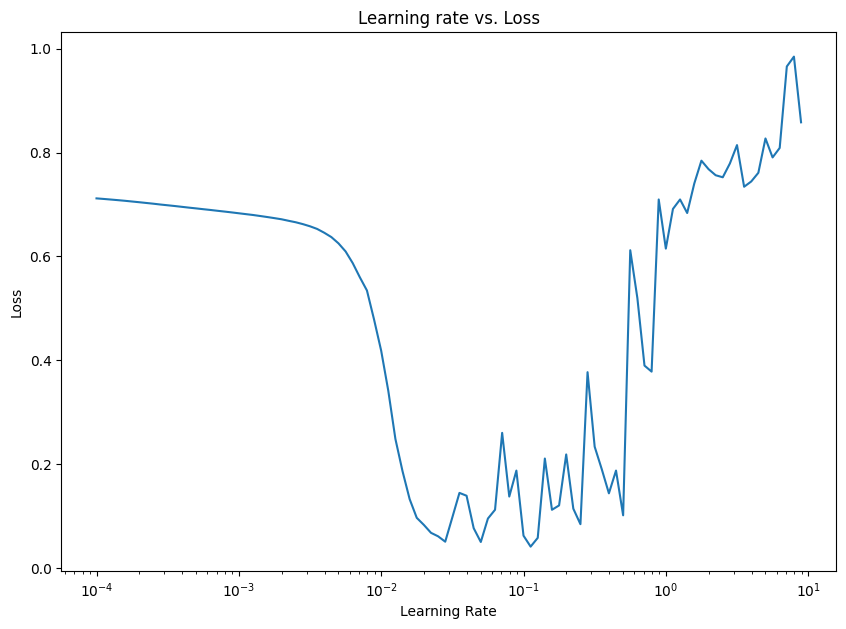

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
len(lrs)

100

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.4787
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5400
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5675
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.5888
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6125
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.6500
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7038
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7975
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8425
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8687
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9600


[0.14835554361343384, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


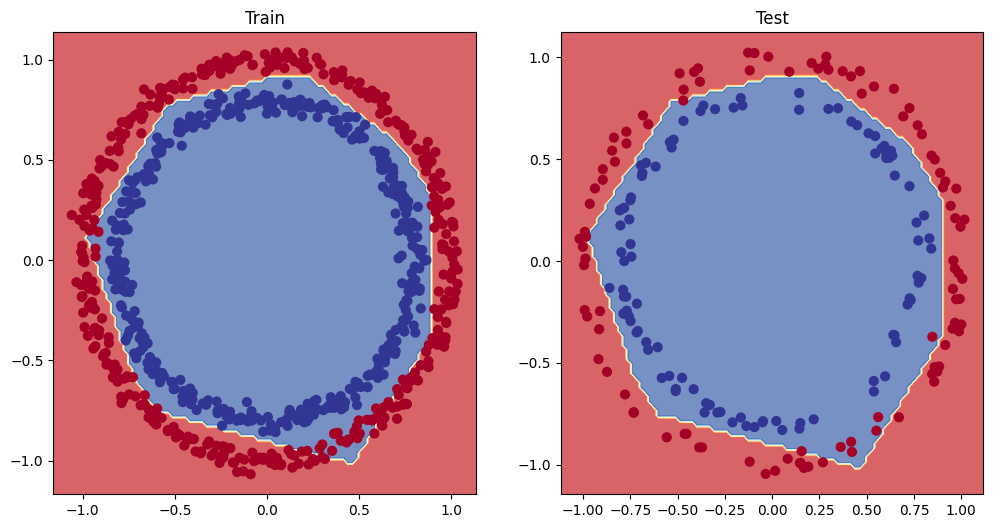

In [ ]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

from tensorflow.python.ops.gen_nn_ops import softmax_cross_entropy_with_logits_eager_fallback
###More classification evaluation methods

* Accuracy
* Precision
* Recall
* F-1 score
* Confusion matrix
* classification report scikit-learn

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9600
Model loss on the test set: 0.14835554361343384
Model accuracy on the test set: 96.00%


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[93,  8],
       [ 0, 99]])

Pretify confusion matrix

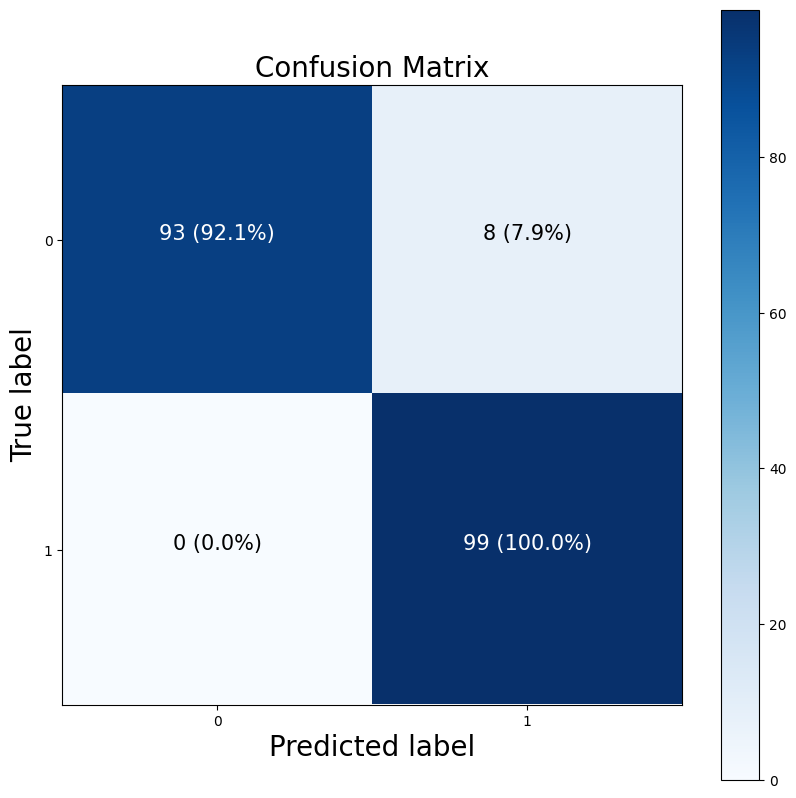

In [ ]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels= classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

###Larger example (Multiclass classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

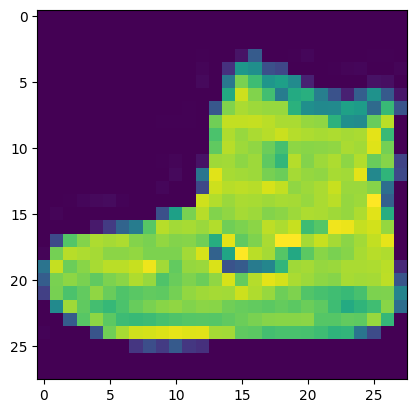

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
train_labels[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

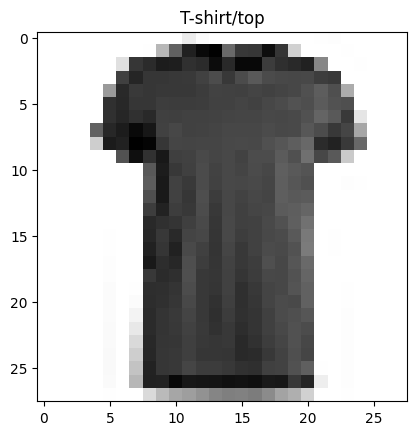

In [ ]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

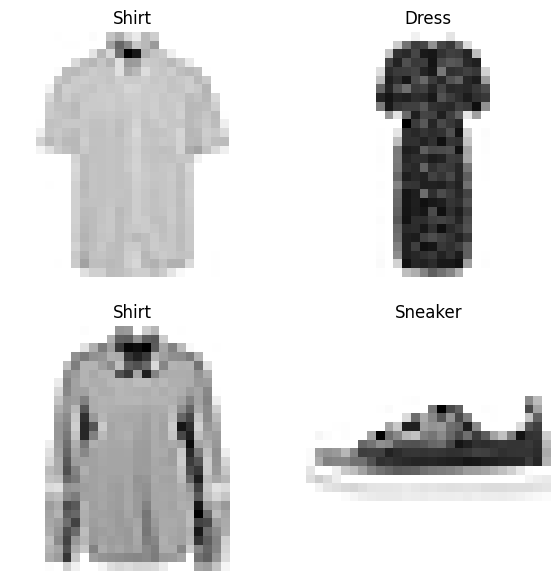

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##building a multiclass classification model

similar architecture as binary
* input shape = 28 x 28 shape of one image
* output shape = 10 one per class of clothing
* loss function = tf.keras.losses.CategoricalCrossEntropy()
* ouput layer activation = Softmax

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5784 - accuracy: 0.0968 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3016 - accuracy: 0.0995 - val_loss: 2.3021 - val_accuracy: 0.1006
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2805 - accuracy: 0.1128 - val_loss: 2.2673 - val_accuracy: 0.1157
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2396 - accuracy: 0.1294 - val_loss: 2.2173 - val_accuracy: 0.1354
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1589 - accuracy: 0.1544 - val_loss: 2.0892 - val_accuracy: 0.1733
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9299 - accuracy: 0.1987 - val_loss: 1.7793 - val_accuracy: 0.2471
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7526 - accuracy: 0.2384 - val_loss: 1.7105 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled( or normalized) they like numbers in between 0 and 1

In [ ]:
#divide by maximum to get value in between 0 and 1
train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#data is normalized find a model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0499 - accuracy: 0.6053 - val_loss: 0.7830 - val_accuracy: 0.6902
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7175 - accuracy: 0.7125 - val_loss: 0.7141 - val_accuracy: 0.7056
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6722 - accuracy: 0.7397 - val_loss: 0.6986 - val_accuracy: 0.7392
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6434 - accuracy: 0.7599 - val_loss: 0.6732 - val_accuracy: 0.7510
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6243 - accuracy: 0.7679 - val_loss: 0.6497 - val_accuracy: 0.7622
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6095 - accuracy: 0.7746 - val_loss: 0.6515 - val_accuracy: 0.7636
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6018 - accuracy: 0.7795 - val_loss: 0.6464 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

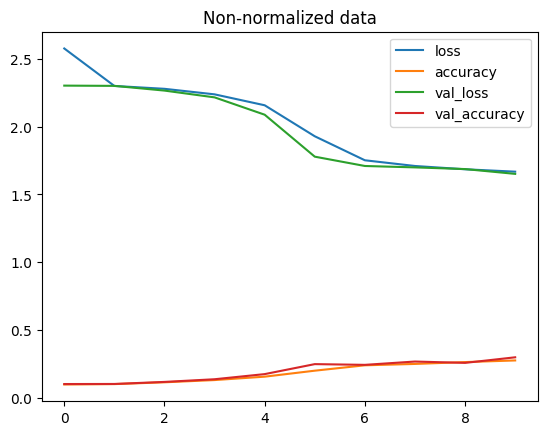

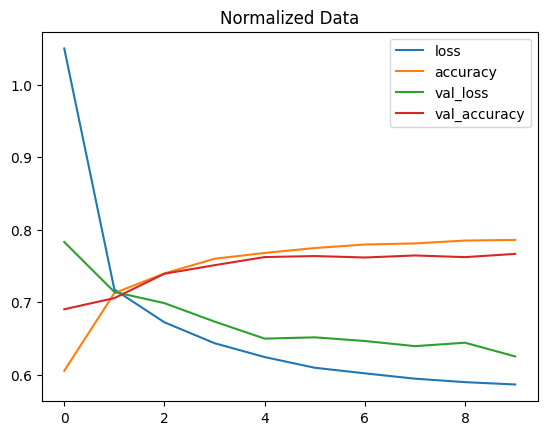

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

###Finding ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 2.7878 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

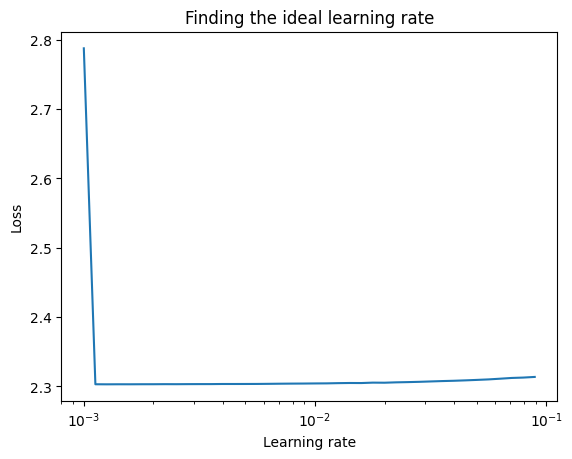

In [ ]:

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3484 - accuracy: 0.4575 - val_loss: 0.9823 - val_accuracy: 0.5583
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8571 - accuracy: 0.6557 - val_loss: 0.7823 - val_accuracy: 0.6923
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.7420 - val_loss: 0.6782 - val_accuracy: 0.7639
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6110 - accuracy: 0.7894 - val_loss: 0.6169 - val_accuracy: 0.7900
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5684 - accuracy: 0.8037 - val_loss: 0.6036 - val_accuracy: 0.7930
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5421 - accuracy: 0.8139 - val_loss: 0.5786 - val_accuracy: 0.7966
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5269 - accuracy: 0.8181 - val_loss: 0.5724 - val_accuracy: